<a href="https://colab.research.google.com/github/rajathAgalkote/CreditCard_Fraud_Detection/blob/main/Rajathadri_CreditCard_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name : Creditcard Fraud Detection**


### Contribution : Rajathadri A S

### Dataset : https://www.kaggle.com/datasets/dhanushnarayananr/credit-card-fraud

Total cells: 78

### **Project Objective :**

To analyse the given transactions' dataset and determine the factors that allow bandwidth for fraudsters.

And to hopefully provide a plausible solution that can reduce fraud transactions to a minimum.

### **Project Summary :**

The evolution of digital payments has been a transformative journey, revolutionizing the way people make transactions and manage their finances. Starting from the use of credit cards to the recent development of mobile payment systems and digital wallets, digital payments have come a long way. 

Today, digital payments offer increased convenience, speed, and security, making it easier for people to manage their finances. With advancements in technology, the evolution of digital payments is set to continue, offering more innovative and secure payment options to users.

One of the most popular modes of digital payment is **"Credit Card"**. Credit card payments have become a convenient and widely used method of making transactions. However, with the increasing use of credit cards comes the growing concern of credit card fraud. 

The industry is continuously working towards improving security measures, including the implementation of Chip and Pin technology and the use of fraud detection algorithms to stay ahead of evolving threats.

### **Problem Statement :**    

Credit card fraud is a growing concern for individuals, financial institutions, and governments globally. With the increasing use of credit cards and online transactions, the risk of fraudulent activities has also increased. 

Fraudsters use various methods such as skimming, phishing, and counterfeiting to steal personal and financial information to make unauthorized transactions. 

The impact of credit card fraud can be significant, ranging from financial loss to a damaged credit score and a loss of trust in financial institutions. It is imperative to develop effective strategies to detect and prevent credit card fraud to safeguard the interests of all stakeholders.


## Coding :

#### **Initializing Dataset**

In [ ]:
# Let us first understand our dataset

In [1]:
# Import Libraries

import numpy as np
import pandas as pd
import io
from numpy import math
from numpy import loadtxt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams

In [2]:
# Ignore Warnings

import warnings

warnings.simplefilter('ignore')

In [3]:
# Loading Dataset

from google.colab import files
uploaded = files.upload()

Saving card_transdata.csv to card_transdata.csv


In [4]:
df = pd.read_csv(io.BytesIO(uploaded['card_transdata.csv']))

In [ ]:
# Glance of the dataframe

df

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


In [10]:
# .INFO of the DataFrame

df.info

<bound method DataFrame.info of         distance_from_home  distance_from_last_transaction  \
0                57.877857                        0.311140   
1                10.829943                        0.175592   
2                 5.091079                        0.805153   
3                 2.247564                        5.600044   
4                44.190936                        0.566486   
...                    ...                             ...   
999995            2.207101                        0.112651   
999996           19.872726                        2.683904   
999997            2.914857                        1.472687   
999998            4.258729                        0.242023   
999999           58.108125                        0.318110   

        ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                             1.945940              1.0        1.0   
1                             1.294219              1.0        0.0   
2            

The Dataset has 8 columns and 1,000,000 rows.

## Dataset Features:

1. distance_from_home - the distance from home where the transaction happened.

2. distance_from_last_transaction - the distance from last transaction happened.

3. ratio_to_median_purchase_price - Ratio of purchased price transaction to median purchase price.

4. repeat_retailer - Is the transaction happened from same retailer.

5. used_chip - Is the transaction through chip (credit card).

6. used_pin_number - Is the transaction happened by using PIN number.

7. online_order - Is the transaction an online order.

8. fraud - Is the transaction fraudulent.

#### **Checking if the Dataset is cleaned:**

In [5]:
# DataFrame rows and columns

df.shape

(1000000, 8)

In [6]:
# DataFrame columns

df.columns

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'],
      dtype='object')

In [7]:
# Checking for Duplicate Values

len(df[df.duplicated()])

0

In [8]:
# Checking for NULL values

print(df.isnull().sum())

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64


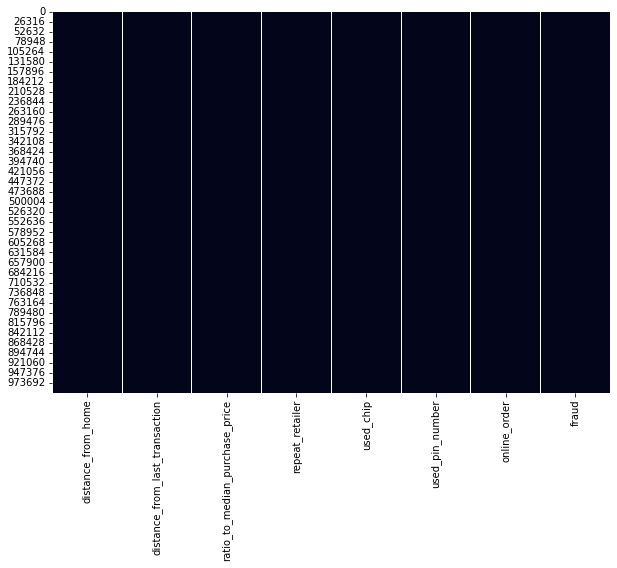

In [9]:
# Visualizing the missing values to confirm

plt.figure(figsize=(10,7))
sns.heatmap(df.isnull(), cbar=False)

No NULL values visible on Heatmap

**The Dataset is clean with no Duplicate or NULL values.**

Therefore, we can conclude that the Dataset is cleaned and no further cleaning of data is required.

### Checking for unique values in each column

In [ ]:
for i in df.columns.tolist():
  print("Unique values in ",i,": ",df[i].nunique())

Unique values in  distance_from_home :  1000000
Unique values in  distance_from_last_transaction :  1000000
Unique values in  ratio_to_median_purchase_price :  1000000
Unique values in  repeat_retailer :  2
Unique values in  used_chip :  2
Unique values in  used_pin_number :  2
Unique values in  online_order :  2
Unique values in  fraud :  2


## **Data Wrangling code:**

In [ ]:
# Making a duplicate copy of dataset for redundancy
ds = df.copy()

In [ ]:
ds[ds['fraud']==1].median()

distance_from_home                15.454219
distance_from_last_transaction     1.157631
ratio_to_median_purchase_price     5.071294
repeat_retailer                    1.000000
used_chip                          0.000000
used_pin_number                    0.000000
online_order                       1.000000
fraud                              1.000000
dtype: float64

From the above table, it is evident that Majority of the transactions involve the following:

Repeat retailer : True 

Used Chip : False

Used Pin Number : False

Online Order : True 

<br>

So the majority of transactions have made online orders and have been to repeat retailers, but haven't used pin number or chip.

<br>

.

In [ ]:
# Creating a separate dataframe for "fraud" entries

ds_f = ds[ds['fraud']==1]
ds_f

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
13,2.131956,56.372401,6.358667,1.0,0.0,0.0,1.0,1.0
24,3.803057,67.241081,1.872950,1.0,0.0,0.0,1.0,1.0
29,15.694986,175.989182,0.855623,1.0,0.0,0.0,1.0,1.0
35,26.711462,1.552008,4.603601,1.0,1.0,0.0,1.0,1.0
36,10.664474,1.565769,4.886521,1.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...
999908,45.296658,0.882736,8.856861,1.0,0.0,0.0,1.0,1.0
999916,167.139756,0.282253,0.308468,1.0,0.0,0.0,1.0,1.0
999919,124.640118,0.004416,0.434885,1.0,0.0,0.0,1.0,1.0
999939,51.412900,3.429330,29.914254,1.0,0.0,0.0,1.0,1.0


In [ ]:
# Pivot table to explore correlation with 'fraud'

ds.pivot_table(['distance_from_home','distance_from_last_transaction','ratio_to_median_purchase_price'],['fraud'],aggfunc=np.median)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price
fraud,,,
0.0,9.673847,0.985074,0.913950
1.0,15.454219,1.157631,5.071294


## **Data Visualization**

In [ ]:
# I am setting the default cmap to 'plasma'
plt.rcParams['image.cmap'] = 'plasma'
plt.rcParams["figure.autolayout"] = True

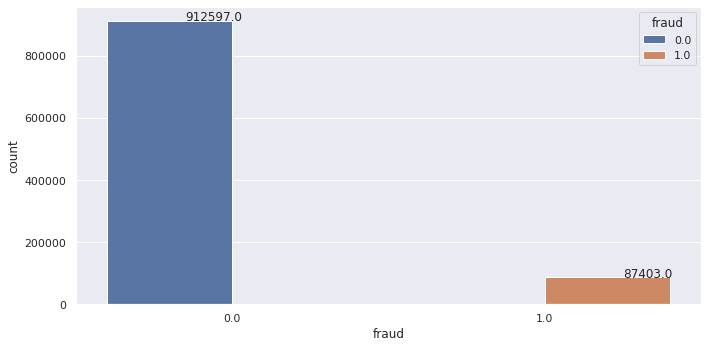

In [ ]:
# plotting a simple countplot chart

sns.set(rc={'figure.figsize':(10,5)})

ax = sns.countplot(x='fraud', hue='fraud', data=ds)

# Display the counts for each column using annotate function
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

Considering the entire dataset (ds), we can claim that 8.74% of the transactions are detected malicious and are categorized as "FRAUD" transactions.

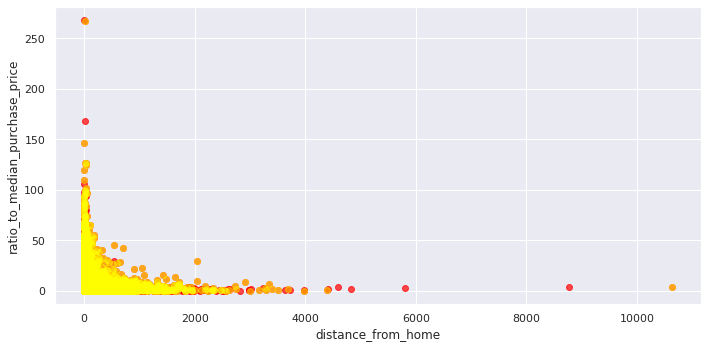

<Figure size 144x144 with 0 Axes>

In [ ]:
# Scatterplot to understand the distribution of dataset w.r.t "Distance from home" and "Distance from last transaction"

plt.scatter('distance_from_home','ratio_to_median_purchase_price',data=ds, c="red", alpha=0.7)
plt.scatter('distance_from_home','ratio_to_median_purchase_price',data=ds_f, c="yellow",alpha = 0.5)

plt.xlabel('distance_from_home')
plt.ylabel('ratio_to_median_purchase_price')

plt.figure(figsize=(2, 2))
plt.show()

It is not possible to extract any clear information from the above scatterplot.

In [ ]:
pd.pivot_table(data=ds,values=['repeat_retailer','used_chip','used_pin_number','online_order'],index='fraud')

,online_order,repeat_retailer,used_chip,used_pin_number
fraud,,,,
0.0,0.622225,0.881672,0.359402,0.109944
1.0,0.946318,0.880119,0.256399,0.003123


From the above pivot table, it is evident that there is 

<br>

less fraud in case of

"used_pin_number" (2.7%) 

<br>

whereas the fraud is high for

"used_chip" (41.63%) 

repeat retailers (49.95%) and 

online orders (60.33%).

Kindly note : The above numbers are not precise. It just gives us an estimate that helps us to make claims.

Claim : Fraud is less when Pin Number is used, compared to other factors.

## Repeat Retailer vs Fraud

In [ ]:
# Pivot table to explore correlation with 'fraud'

pd.pivot_table(data= ds, values = 'fraud', index = ['repeat_retailer'])

,fraud
repeat_retailer,
0.0,0.088449
1.0,0.087262


In [ ]:
pd.crosstab(ds.fraud, ds.repeat_retailer)

repeat_retailer,0.0,1.0
fraud,,
0.0,107986,804611
1.0,10478,76925


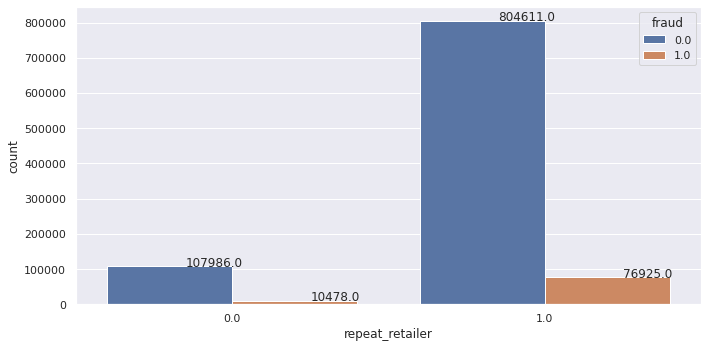

In [ ]:
# Defining the plot size
sns.set(rc={'figure.figsize':(10,5)})

ax = sns.countplot(x='repeat_retailer', hue='fraud', data=ds)

# Display the counts for each column using annotate function
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()



*   When there are no repeat retailers, there is 8.84% fraud transactions
*   When there are repeat retailers, there is 8.72% fraud transactions

No conclusive inference can be determined as they are similar stastistics.

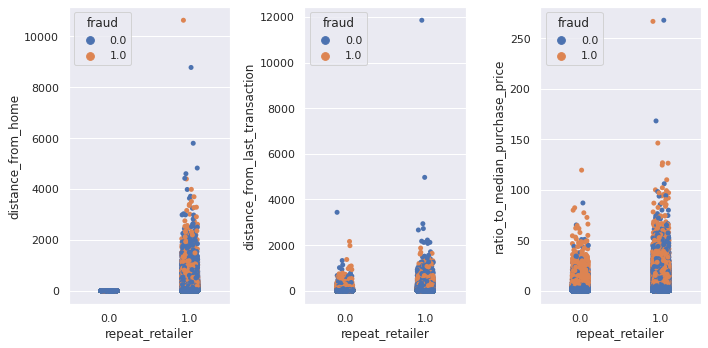

In [ ]:
# Creating Subplots for comparison

figure, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharex=True)

sns.stripplot(ax= ax1, data=ds, x="repeat_retailer", y="distance_from_home", hue="fraud", jitter = True)

sns.stripplot(ax= ax2, data=ds, x="repeat_retailer", y="distance_from_last_transaction", hue="fraud", jitter = True)

sns.stripplot(ax= ax3, data=ds, x="repeat_retailer", y="ratio_to_median_purchase_price", hue="fraud", jitter = True)

plt.show()

We have already determined that there is an overall 49.95% fraud when there are repeat retailer transactions.

By exploring the correlation between repeat retailers and other features, we can determine the following:



*   the fraud transactions are more densely accumulated when there is no repeat_retailer and the ratio to median purchase price is less than 50
*   Ideally, when distance from home, distance from last transaction and ratio to median purchase price are closer to ZERO, there are NIL fraud transactions.





---



## Used Chip vs Fraud

In [ ]:
# Pivot table to explore correlation with 'fraud'
pd.pivot_table(data= ds, values = 'fraud', index = ['used_chip'])

,fraud
used_chip,
0.0,0.100051
1.0,0.063956


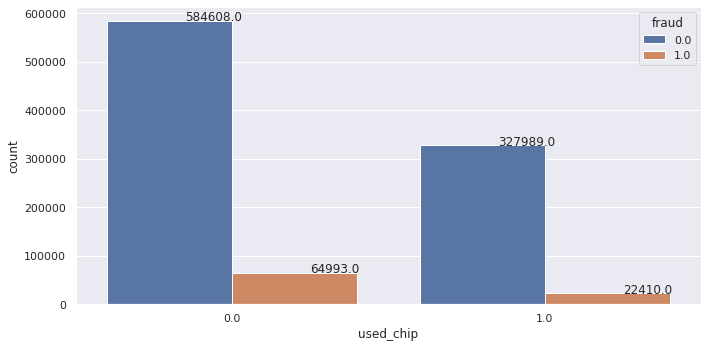

In [ ]:
# Defining the plot size
sns.set(rc={'figure.figsize':(10,5)})

ax = sns.countplot(x='used_chip', hue='fraud', data=ds)

# Display the counts for each column using annotate function
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

* When chip was not used, there are 10% fraud transations.
* When chip was used, there are 6.39% fraud transations.

Although not conclusive, when the chip was used, the transactions are statistically slightly safer.

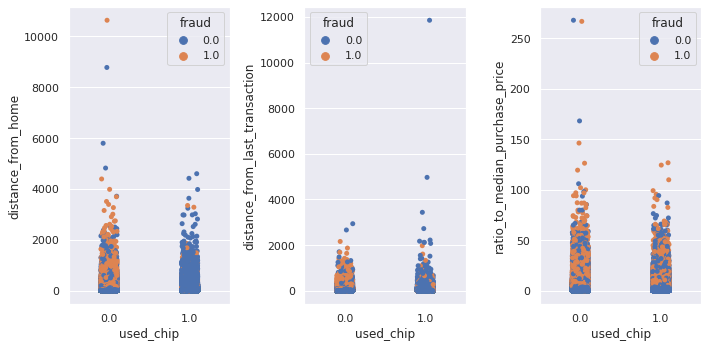

In [ ]:
# Creating Subplots for comparison

figure, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharex=True)

sns.stripplot(ax= ax1, data=ds, x="used_chip", y="distance_from_home", hue="fraud", jitter = True)

sns.stripplot(ax= ax2, data=ds, x="used_chip", y="distance_from_last_transaction", hue="fraud", jitter = True)

sns.stripplot(ax= ax3, data=ds, x="used_chip", y="ratio_to_median_purchase_price", hue="fraud", jitter = True)

plt.show()

There are two evident conclusions from the above graph:

* When chip was used there are almost negligible number of fraud transactions with respect to distance from home.
* When chip was used there are almost negligible number of fraud transactions with respect to distance from last transaction.



---



## Used Pin Number vs Fraud

In [ ]:
# Pivot table to explore correlation with 'fraud'
pd.pivot_table(data= ds, values = 'fraud', index = ['used_pin_number'])

,fraud
used_pin_number,
0.0,0.096877
1.0,0.002714


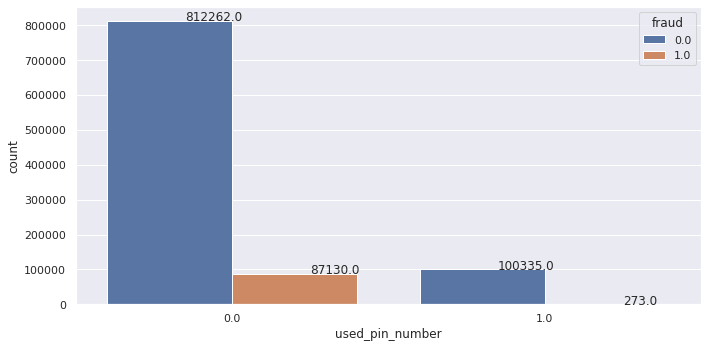

In [ ]:
sns.set(rc={'figure.figsize':(10,5)})

ax = sns.countplot(x='used_pin_number', hue='fraud', data=ds)

# Display the counts for each column using annotate function
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

* When pin number was not used, there are 9.68% fraud transactions.
* When pin number was used, there are 0.27% fraud transactions.

It is extremely evident that using Pin Number is definitely one of the safest solutions to prevent fraud transactions.

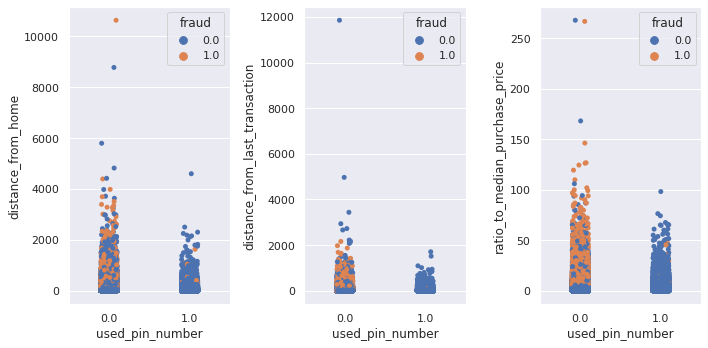

In [ ]:
# Creating Subplots for comparison

figure, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharex=True)

sns.stripplot(ax= ax1, data=ds, x="used_pin_number", y="distance_from_home", hue="fraud", jitter = True)

sns.stripplot(ax= ax2, data=ds, x="used_pin_number", y="distance_from_last_transaction", hue="fraud", jitter = True)

sns.stripplot(ax= ax3, data=ds, x="used_pin_number", y="ratio_to_median_purchase_price", hue="fraud", jitter = True)

plt.show()

The above graph justifies the assumption made before.

**Using pin number is definitely one of the safest solutions to prevent fraud transactions.** 



---



## Online Order vs Fraud

In [ ]:
# Pivot table to explore correlation with 'fraud'
pd.pivot_table(data= ds, values = 'fraud', index = ['online_order'])

,fraud
online_order,
0.0,0.013427
1.0,0.127140


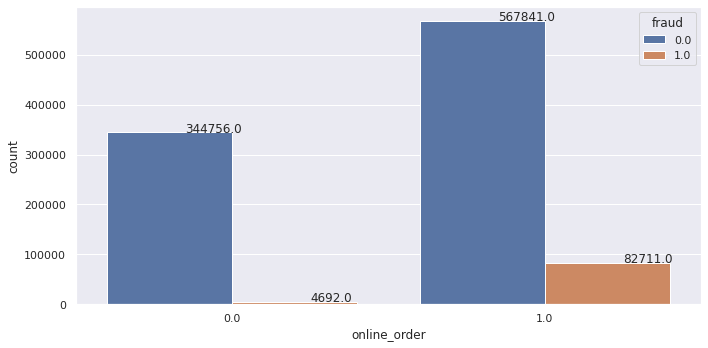

In [ ]:
# Defining the plot size
sns.set(rc={'figure.figsize':(10,5)})

ax = sns.countplot(x='online_order', hue='fraud', data=ds)

# Display the counts for each column using annotate function
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

* When there was no online order, there are 1.34% fraud transactions.
* When there was online order, there are 12.71% fraud transactions.

From the above graph, we can claim that avoiding online orders can avoid fraud transactions by a significant magnitude.

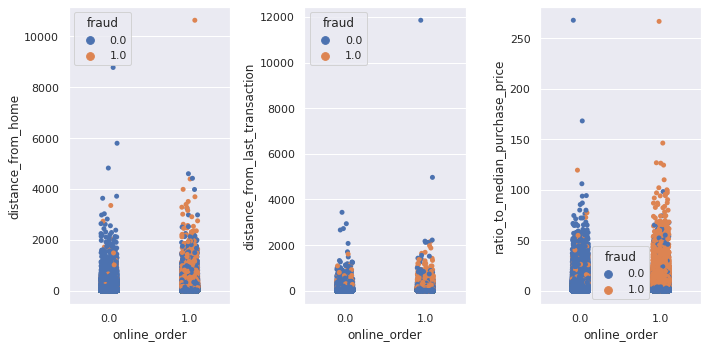

In [ ]:
# Creating Subplots for comparison

figure, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharex=True)

sns.stripplot(ax= ax1, data=ds, x="online_order", y="distance_from_home", hue="fraud", jitter = True)

sns.stripplot(ax= ax2, data=ds, x="online_order", y="distance_from_last_transaction", hue="fraud", jitter = True)

sns.stripplot(ax= ax3, data=ds, x="online_order", y="ratio_to_median_purchase_price", hue="fraud", jitter = True)

plt.show()

From the graph we can conclude that the claim/assumption made above is true.

Fraud transactions can be prevented by avoiding online orders.



---



In [ ]:
# Pivot table to explore correlation with 'fraud'
pd.pivot_table(data= ds, values = ['repeat_retailer','used_chip','used_pin_number','online_order'], index = 'fraud', aggfunc= np.sum)

,online_order,repeat_retailer,used_chip,used_pin_number
fraud,,,,
0.0,567841.0,804611.0,327989.0,100335.0
1.0,82711.0,76925.0,22410.0,273.0


## **Solution to Objective**

### Throughout the project, several claims were made and cross-analysis was made to draw inferences.

Summarizing the inferences made:

1. 8.74% of the total transactions are fraud.

2. Factors of transactions:
    * Repeat retailers have no effect on fraud transactions.
    * Using chip is slightly better than not using chip.
    * When Pin number is used, fraud transactions are almost **NIL**.
    * Avoiding online orders can significantly reduce fraud transactions.

### Plausible Solutions

1. This analysis should be made public and CreditCard users must be informed that traansactions that are closer to home/to previous transactions are less likely to lead to fraud.

2. Transactions without using chips should be reduced.

3. It is the safest solution to use PIN number for each and every transactions.

4. Although it is not ideal to completely avoid online transactions, if it is possible to substitute online transaction with offline transaction, it should definitely be opted for.

# **Conclusion**

The provided dataset was analysed and the factors that had the most impact on Fraud transactions were determined.

Furthermore, plausible solutions to avoid future creditcard fraud transactions were recommended.

Overall In this project, several perspectives have been explored, relevent tabular data has been established, and with the assistance of visual story-telling several plausible solutions have been recommended.

# ** **Thank you.** **